In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt



2023-05-22 09:16:39.953118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 09:16:40.169424: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-22 09:16:40.213088: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 09:16:40.213102: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


2023-05-22 09:16:44.738300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-22 09:16:44.738321: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-22 09:16:44.738339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Windows): /proc/driver/nvidia/version does not exist
2023-05-22 09:16:44.738533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 1.6711 - accuracy: 0.4000 - val_loss: 1.4333 - val_accuracy: 0.4767
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.3262 - accuracy: 0.5299 - val_loss: 1.2725 - val_accuracy: 0.5478
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 1.2128 - accuracy: 0.5723 - val_loss: 1.2064 - val_accuracy: 0.5741
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 1.1398 - accuracy: 0.6000 - val_loss: 1.1795 - val_accuracy: 0.5802
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 1.0818 - accuracy: 0.6221 - val_loss: 1.1700 - val_accuracy: 0.5885
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 1.0350 - accuracy: 0.6380 - val_loss: 1.1753 - val_accuracy: 0.5941
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0007 - accuracy: 0.6517 - val_loss: 1.0751 - val_accuracy:

In [4]:

# Select a random test image
index = np.random.randint(0, len(x_test))
test_image = x_test[index]
test_label = y_test[index]

# Reshape the image to match the input shape of the model
test_image = np.expand_dims(test_image, axis=0)

# Perform prediction for the test image
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 65ms/step


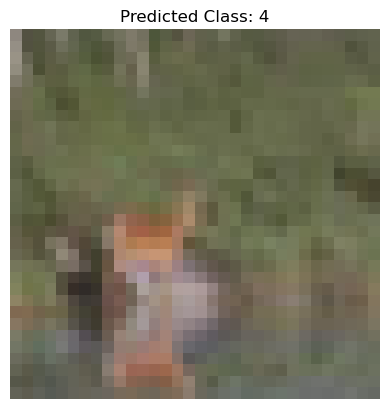

In [5]:

# Display the test image and the predicted class
plt.imshow(test_image.squeeze())
plt.title("Predicted Class: {}".format(predicted_class))
plt.axis('off')
plt.show()


In [6]:

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print(confusion_mtx)


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1000
           1       0.84      0.70      0.76      1000
           2       0.58      0.40      0.47      1000
           3       0.44      0.49      0.47      1000
           4       0.56      0.61      0.59      1000
           5       0.52      0.62      0.56      1000
           6       0.76      0.71      0.73      1000
           7       0.69      0.72      0.71      1000
           8       0.74      0.78      0.76      1000
           9       0.70      0.77      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

[[668  18  52  34  19  11  11  23 110  54]
 [ 21 703  13  21   3  10  11  12  54 152]
 [ 81   3 396 101 147 121  60  55  22  14]
 [ 11   6  49 495  80 226  56  38  15  24]
 [ 25   4  63 

In [7]:
#Learn HOW to read Confusion MATRIX